<a href="https://colab.research.google.com/github/JingyuHe02/COMP3132/blob/main/Lab_Week04/LabWeek4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4: Basic regression - Predict fuel efficiency



## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error


## Load data

In [4]:
from pathlib import Path

# Download mpg.csv from GitHub
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv'
df = pd.read_csv(url)

# Drop missing values (horsepower has NaNs)
df = df.dropna().reset_index(drop=True)

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


MPG dataset can be viewed online at  
https://github.com/mwaskom/seaborn-data/blob/master/mpg.csv

## Data Exploration - Pandas Review

### Show the first 5 rows of the dataset

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### Show the size of the dataframe

In [6]:
df.shape

(392, 9)

### Find the columns name and their types (numerical or categorical)

In [7]:
# Column names and dtypes
# (Numerical columns will show int/float; categorical columns are usually object)
df.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,float64
weight,int64
acceleration,float64
model_year,int64
origin,object
name,object


### Find the number of missing values in each column

In [8]:
df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0
name,0


### Handle the missing values in the dataframe

Since the number of missing values is low, we can simply drop the rows containing them. However, as a practice and review, let's substitute the missing values in the numerical columns (if any) with the mean of the respective column and the missing values in the categorical columns (if any) with the median of the respective column.

In [ ]:
#your solution here

### Compute the average and the median weight

In [9]:
avg_weight = df['weight'].mean()
median_weight = df['weight'].median()
avg_weight, median_weight

(np.float64(2977.5841836734694), 2803.5)

### Find the number of cars that weight more than 2000 kgs

In [10]:
(df['weight'] > 2000).sum()

np.int64(349)

### Find how many cars there are for each number of cylinders

In [11]:
df['cylinders'].value_counts()

,count
cylinders,
4,199
8,103
6,83
3,4
5,3


### Find what are the car models with number of cylinders (3 or 5)

In [12]:
df.loc[df['cylinders'].isin([3, 5]), 'name'].unique()

array(['mazda rx2 coupe', 'maxda rx3', 'mazda rx-4', 'audi 5000',
       'mercedes benz 300d', 'audi 5000s (diesel)', 'mazda rx-7 gs'],
      dtype=object)

### Show the `value_counts()` of `origin` column or show the unique values of this column.

In [13]:
df['origin'].value_counts()

,count
origin,
usa,245
japan,79
europe,68


## Data Preprocessing

### Use one hot encoding to change the categorical values of `origin` column to numerical values.

- use `pd.get_dummies()` method to do the encoding
- Join the original DataFrame with the new dummy DataFrame with `pd.concat()` and use `axis=1` to concate in horizontal direction.

In [14]:
origin_dummies = pd.get_dummies(df['origin'], prefix='origin')
df = pd.concat([df, origin_dummies], axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,False,False,True
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,False,False,True
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,False,False,True
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,False,False,True
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,False,False,True


### Remove the `name` and `origin` column form the dataframe to have all numerical dataframe.

In [15]:
df = df.drop(columns=['name', 'origin'])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449,10.5,70,False,False,True


### Does the input needs reshaping?

In [16]:
# Input is already 2D: (n_samples, n_features)
df.shape

(392, 10)

### Form features `X` and labels `y` based on the processed datafram

In [17]:
X = df.drop(columns=['mpg'])
y = df['mpg']
X.shape, y.shape

((392, 9), (392,))

### Split the data into training and test sets and form `train_features`, `train_labels`, `test_features`, `test_labels`

In [18]:
train_features, test_features, train_labels, test_labels = train_test_split(
    X, y, test_size=0.2, random_state=42
)
train_features.shape, test_features.shape, train_labels.shape, test_labels.shape

((313, 9), (79, 9), (313,), (79,))

### For simplicity in the following steps, convert the dataset from a pandas DataFrame to a numpy array.

In [19]:
train_features = np.array(train_features, dtype=np.float32)
train_labels = np.array(train_labels, dtype=np.float32)
test_features = np.array(test_features, dtype=np.float32)
test_labels = np.array(test_labels, dtype=np.float32)

### Do some sanity check on the shape of the data before building a model

In [22]:
print('train_features:', train_features.shape)
print('train_labels  :', train_labels.shape)
print('test_features :', test_features.shape)
print('test_labels   :', test_labels.shape)

print('Missing values in train_features:', np.isnan(train_features).sum())

train_features: (313, 9)
train_labels  : (313,)
test_features : (79, 9)
test_labels   : (79,)
Missing values in train_features: 0


## Normalization layer

To ensure stable training of neural networks, we typically normalize the data. This process also enhances the convergence of the gradient descent algorithm.

There is not single way to normalize the data. You can also use `scikit-learn `or `pandas` to do it. However, in this lab, we will use the normalization layer provided by tensorflow which matches the other parts of the model.

The `tf.keras.layers.Normalization` is a clean and simple way to add feature normalization into your model.

The first step is to create the layer:

In [23]:
scaler = StandardScaler()

Then, fit the state of the preprocessing layer to the data by calling `Normalization.adapt`.

It calculates the mean and variance of each feature, and store them in the layer

In [24]:
scaler.fit(train_features)

StandardScaler()

When the layer is called, it returns the input data, with each feature independently normalized.

In [25]:
first = train_features[0]
print('First example:', first)
print()
print('Normalized:', scaler.transform([first])[0])

First example: [6.00e+00 2.25e+02 1.10e+02 3.62e+03 1.87e+01 7.80e+01 0.00e+00 0.00e+00
 1.00e+00]

Normalized: [ 0.30486156  0.28457757  0.14142863  0.75480297  1.12175916  0.49452752
 -0.42559614 -0.50199602  0.74128601]


## **Approach #1:** Regression using `Linear Regression`

**You are welcome to use scikit-learn to perform linear regression on this dataset.**

However, here we aim to implement it using TensorFlow.

- As we saw in Lab Week 2, `logistic regression` is essentially a single neuron with a `sigmoid` activation function.

- Similarly, `linear regression` can be viewed as a single neuron with a `linear` activation function.

### **Step 1:** Linear regression model architecture

In [26]:
linear_model = LinearRegression()

**Note:** You can define your model all at once like the cell above or you can buid the model incrementaly  (suitable for your assignment)

In [27]:
linear_model

LinearRegression()

### **Step 2:** Configure the model with Keras `Model.compile()`

The most important arguments to compile are the `loss` and the `optimizer`, since these define what will be optimized (`"mean_absolute_error"`) and how (using the `tf.keras.optimizers.Adam(learning_rate=0.1)`).

**arguments:**
- optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
- loss='mean_absolute_error'

In [28]:
# scikit-learn models don't need compile()

### **Step 3:** Train the model using the `Model.fit()` for `100` epochs, and store the output in a variable named history.

In [29]:
# Train
linear_model.fit(train_features, train_labels)

# Create a simple history-like dict so the plotting cell still works
train_pred = linear_model.predict(train_features)
train_mae = mean_absolute_error(train_labels, train_pred)
history = {'loss': [train_mae]}
history

{'loss': [2.5445823669433594]}

In [30]:
history

{'loss': [2.5445823669433594]}

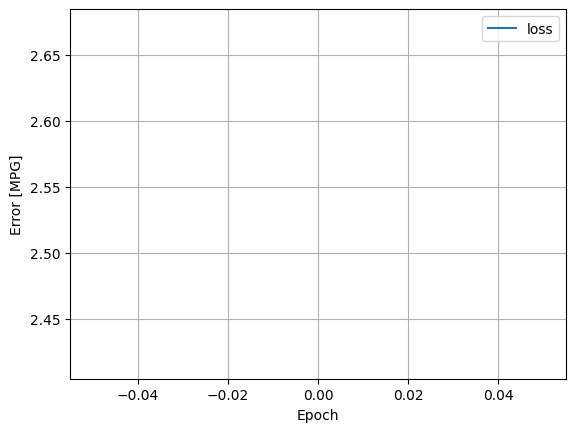

In [31]:
def plot_loss(history_obj):
  losses = history_obj.get('loss', [])
  plt.plot(losses, label='loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

### Get the model summary

In [32]:
print('Linear Regression coefficients:', linear_model.coef_)
print('Linear Regression intercept   :', linear_model.intercept_)

Linear Regression coefficients: [-0.34210283  0.01920596 -0.02162048 -0.00642267  0.04219787  0.79716045
  0.84834325  1.1788118  -2.027155  ]
Linear Regression intercept   : -17.304688


### **Step 4:** Evaluate the linear model on the test set using Keras `Model.evaluate()` and see the `mean_absolute_error` and save the result for future comparison.

In [33]:
test_pred = linear_model.predict(test_features)
linear_result = mean_absolute_error(test_labels, test_pred)
linear_result

2.4619991779327393

## **Approach #2:** Regression using a `Deep Neural Network (DNN)`

### Solve the same problem and using deep neural network with the sample architecture;
- 1st hidden layer no. of units =  64
- 2nd hidden layer no. of units = 64
- Choose appropriate `activation` functions for hidden and output layers

In [34]:
# DNN with 2 hidden layers (64, 64)
# Fast settings: fewer iterations
train_features_scaled = scaler.transform(train_features)
test_features_scaled = scaler.transform(test_features)

dnn_model = MLPRegressor(
    hidden_layer_sizes=(64, 64),
    activation='relu',
    solver='adam',
    max_iter=80,
    random_state=42
)

dnn_model.fit(train_features_scaled, train_labels)

dnn_test_pred = dnn_model.predict(test_features_scaled)
dnn_result = mean_absolute_error(test_labels, dnn_test_pred)
dnn_result

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(


3.177659749984741

### Print the model summary (after training). How many parameters are there in the model?

In [35]:
# Estimate trainable parameters (same idea as Keras summary)
n_features = train_features.shape[1]
h1, h2 = 64, 64
params = (n_features*h1 + h1) + (h1*h2 + h2) + (h2*1 + 1)
print('Estimated trainable parameters:', params)

Estimated trainable parameters: 4865


## Compare the evaluation result of the two approaches, i.e., linear regression and deep neural network.

In [36]:
print('Linear Regression MAE:', linear_result)
print('DNN (2x64) MAE        :', dnn_result)

Linear Regression MAE: 2.4619991779327393
DNN (2x64) MAE        : 3.177659749984741


## Use the following large model and evaluate it on the test set.

In [37]:
# Larger DNN: 4 hidden layers (64,64,64,64)
# Fast settings: fewer iterations

dnn_large_model = MLPRegressor(
    hidden_layer_sizes=(64, 64, 64, 64),
    activation='relu',
    solver='adam',
    max_iter=80,
    random_state=42
)

In [38]:
dnn_large_model.fit(train_features_scaled, train_labels)

large_test_pred = dnn_large_model.predict(test_features_scaled)
large_result = mean_absolute_error(test_labels, large_test_pred)
large_result

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(


2.0187695026397705

### Explain your observation. Why do you think the large model is not performing well?

- hint: when the number of trainable parameters is very large (even larger than the number of data points), the model may overfit the training data. One way to solve this problem is to use more data.